Characterization

In [1]:
import pandas as pd
import nltk
import gc
from nltk.sentiment import SentimentIntensityAnalyzer
import matplotlib.pyplot as plt

# Download VADER lexicon
nltk.download('vader_lexicon')

# File Path
file_path = "cleaned.csv"  # Replace with your actual file path

df = pd.read_csv(file_path)

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\krish\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [2]:
df = df.drop(columns=["images", "user_id"])

In [3]:
df.head().to_string(index=False)
df.head()

,Unnamed: 0,rating,title,text,asin,parent_asin,timestamp,helpful_vote,verified_purchase,tokens,cleaned_text,review_length
0,0,5.0,Pretty locket,i think this locket is really pretty. the insi...,B00LOPVX74,B00LOPVX74,2020-01-09 00:06:34.489,3,True,"['think', 'locket', 'really', 'pretty', '.', '...",think locket really pretty . inside solid silv...,36
1,1,5.0,A,great,B07B4JXK8D,B07B4JXK8D,2020-12-20 01:04:06.701,0,True,['great'],great,1
2,2,2.0,Two Stars,one of the stones fell out within the first 2 ...,B007ZSEQ4Q,B007ZSEQ4Q,2015-05-23 01:33:48.000,3,True,"['stone', 'fell', '2', 'week', 'wearing', '.',...",stone fell 2 week wearing . stone smaller expe...,10
3,3,1.0,Won’t buy again,crappy socks. money wasted. bought to wear wit...,B07F2BTFS9,B07F2BTFS9,2018-12-31 20:57:27.095,2,True,"['crappy', 'sock', '.', 'money', 'wasted', '.'...",crappy sock . money wasted . bought wear tieks...,14
4,4,5.0,I LOVE these glasses,i love these glasses! they fit perfectly over...,B00PKRFU4O,B00XESJTDE,2015-08-13 14:29:26.000,0,True,"['love', 'glass', '!', 'fit', 'perfectly', 're...","love glass ! fit perfectly regular , rectangul...",29


In [4]:
def generalize_rating(r):
    if r <= 2:
        return "Negative"
    elif r == 3:
        return "Neutral"
    else:
        return "Positive"

def generalize_helpful_vote(h):
    if h == 0:
        return "Not Helpful"
    elif h <= 1:
        return "Slightly Helpful"
    else:
        return "Helpful"

def generalize_review_length(l):
    if l <= 5:
        return "Very Short"
    elif l <= 15:
        return "Short"
    elif l <= 30:
        return "Medium"
    else:
        return "Long"

df["generalized_rating"] = df["rating"].apply(generalize_rating)
df["generalized_helpful_vote"] = df["helpful_vote"].apply(generalize_helpful_vote)
df["generalized_review_length"] = df["review_length"].apply(generalize_review_length)


In [5]:
df.head()

,Unnamed: 0,rating,title,text,asin,parent_asin,timestamp,helpful_vote,verified_purchase,tokens,cleaned_text,review_length,generalized_rating,generalized_helpful_vote,generalized_review_length
0,0,5.0,Pretty locket,i think this locket is really pretty. the insi...,B00LOPVX74,B00LOPVX74,2020-01-09 00:06:34.489,3,True,"['think', 'locket', 'really', 'pretty', '.', '...",think locket really pretty . inside solid silv...,36,Positive,Helpful,Long
1,1,5.0,A,great,B07B4JXK8D,B07B4JXK8D,2020-12-20 01:04:06.701,0,True,['great'],great,1,Positive,Not Helpful,Very Short
2,2,2.0,Two Stars,one of the stones fell out within the first 2 ...,B007ZSEQ4Q,B007ZSEQ4Q,2015-05-23 01:33:48.000,3,True,"['stone', 'fell', '2', 'week', 'wearing', '.',...",stone fell 2 week wearing . stone smaller expe...,10,Negative,Helpful,Short
3,3,1.0,Won’t buy again,crappy socks. money wasted. bought to wear wit...,B07F2BTFS9,B07F2BTFS9,2018-12-31 20:57:27.095,2,True,"['crappy', 'sock', '.', 'money', 'wasted', '.'...",crappy sock . money wasted . bought wear tieks...,14,Negative,Helpful,Short
4,4,5.0,I LOVE these glasses,i love these glasses! they fit perfectly over...,B00PKRFU4O,B00XESJTDE,2015-08-13 14:29:26.000,0,True,"['love', 'glass', '!', 'fit', 'perfectly', 're...","love glass ! fit perfectly regular , rectangul...",29,Positive,Not Helpful,Medium


In [6]:
# Count occurrences of each category in generalized attributes
rating_counts = df["generalized_rating"].value_counts()
helpful_vote_counts = df["generalized_helpful_vote"].value_counts()
review_length_counts = df["generalized_review_length"].value_counts()

print("Generalized Rating Counts:\n", rating_counts)
print("\nGeneralized Helpful Vote Counts:\n", helpful_vote_counts)
print("\nGeneralized Review Length Counts:\n", review_length_counts)

Generalized Rating Counts:
 generalized_rating
Positive    1778595
Negative     476873
Neutral      245471
Name: count, dtype: int64

Generalized Helpful Vote Counts:
 generalized_helpful_vote
Not Helpful         2006187
Slightly Helpful     288828
Helpful              205924
Name: count, dtype: int64

Generalized Review Length Counts:
 generalized_review_length
Short         966686
Very Short    706260
Medium        523358
Long          304635
Name: count, dtype: int64


In [7]:
summary = df.groupby(
    ["generalized_rating", "generalized_review_length", "generalized_helpful_vote", "verified_purchase"]
).agg(
    review_count=("rating", "count"),
    avg_rating=("rating", "mean"),
    avg_helpful_vote=("helpful_vote", "mean")
).reset_index()

summary


,generalized_rating,generalized_review_length,generalized_helpful_vote,verified_purchase,review_count,avg_rating,avg_helpful_vote
0,Negative,Long,Helpful,False,1071,1.384687,6.567694
1,Negative,Long,Helpful,True,13296,1.408770,6.214877
2,Negative,Long,Not Helpful,False,4511,1.502328,0.000000
3,Negative,Long,Not Helpful,True,29033,1.448249,0.000000
4,Negative,Long,Slightly Helpful,False,1051,1.485252,1.000000
...,...,...,...,...,...,...,...
67,Positive,Very Short,Helpful,True,11582,4.860905,4.207477
68,Positive,Very Short,Not Helpful,False,16521,4.844198,0.000000
69,Positive,Very Short,Not Helpful,True,476478,4.852279,0.000000
70,Positive,Very Short,Slightly Helpful,False,930,4.846237,1.000000


In [8]:
# Count occurrences of each category in generalized attributes
rating_counts = df["generalized_rating"].value_counts()
helpful_vote_counts = df["generalized_helpful_vote"].value_counts()
review_length_counts = df["generalized_review_length"].value_counts()

print("Generalized Rating Counts:\n", rating_counts)
print("\nGeneralized Helpful Vote Counts:\n", helpful_vote_counts)
print("\nGeneralized Review Length Counts:\n", review_length_counts)

Generalized Rating Counts:
 generalized_rating
Positive    1778595
Negative     476873
Neutral      245471
Name: count, dtype: int64

Generalized Helpful Vote Counts:
 generalized_helpful_vote
Not Helpful         2006187
Slightly Helpful     288828
Helpful              205924
Name: count, dtype: int64

Generalized Review Length Counts:
 generalized_review_length
Short         966686
Very Short    706260
Medium        523358
Long          304635
Name: count, dtype: int64


C:\Users\krish\AppData\Local\Temp\ipykernel_11032\3147376458.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=data.index, y=data.values, palette=palette)


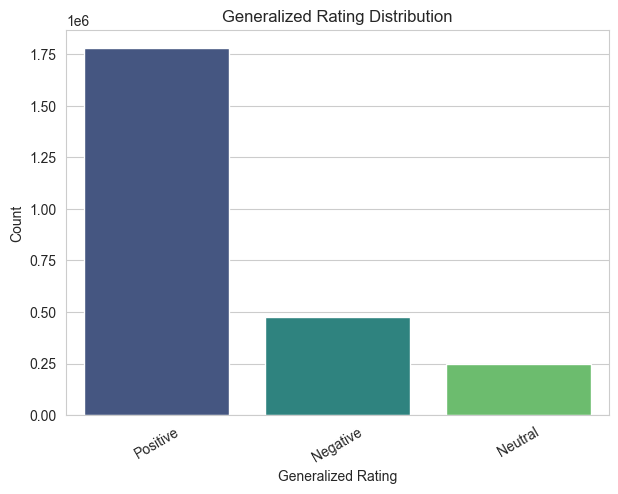

C:\Users\krish\AppData\Local\Temp\ipykernel_11032\3147376458.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=data.index, y=data.values, palette=palette)


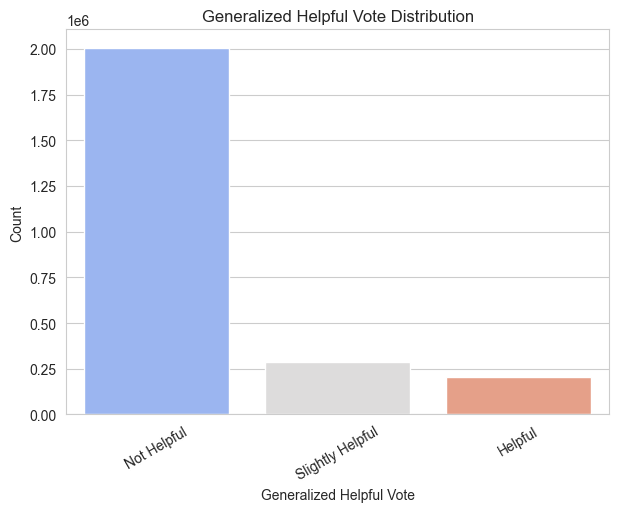

C:\Users\krish\AppData\Local\Temp\ipykernel_11032\3147376458.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=data.index, y=data.values, palette=palette)


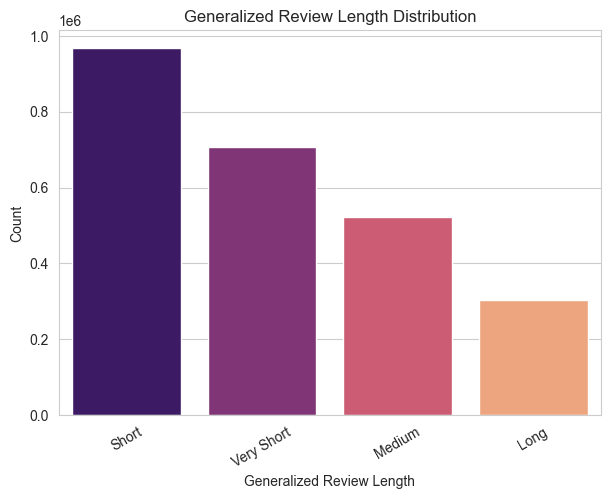

Graphs saved successfully! 🎉


In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set style
sns.set_style("whitegrid")

# Function to save and show plots
def save_and_show_plot(data, title, xlabel, ylabel, filename, palette):
    plt.figure(figsize=(7, 5))
    sns.barplot(x=data.index, y=data.values, palette=palette)
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.xticks(rotation=30)
    
    # Save the figure
    plt.savefig(filename, dpi=300, bbox_inches="tight")
    plt.show()

# Plot and Save Generalized Rating Counts
save_and_show_plot(
    rating_counts, 
    "Generalized Rating Distribution", 
    "Generalized Rating", 
    "Count", 
    "generalized_rating_distribution.png", 
    "viridis"
)

# Plot and Save Generalized Helpful Vote Counts
save_and_show_plot(
    helpful_vote_counts, 
    "Generalized Helpful Vote Distribution", 
    "Generalized Helpful Vote", 
    "Count", 
    "generalized_helpful_vote_distribution.png", 
    "coolwarm"
)

# Plot and Save Generalized Review Length Counts
save_and_show_plot(
    review_length_counts, 
    "Generalized Review Length Distribution", 
    "Generalized Review Length", 
    "Count", 
    "generalized_review_length_distribution.png", 
    "magma"
)

print("Graphs saved successfully! 🎉")


In [10]:
df.head()

,Unnamed: 0,rating,title,text,asin,parent_asin,timestamp,helpful_vote,verified_purchase,tokens,cleaned_text,review_length,generalized_rating,generalized_helpful_vote,generalized_review_length
0,0,5.0,Pretty locket,i think this locket is really pretty. the insi...,B00LOPVX74,B00LOPVX74,2020-01-09 00:06:34.489,3,True,"['think', 'locket', 'really', 'pretty', '.', '...",think locket really pretty . inside solid silv...,36,Positive,Helpful,Long
1,1,5.0,A,great,B07B4JXK8D,B07B4JXK8D,2020-12-20 01:04:06.701,0,True,['great'],great,1,Positive,Not Helpful,Very Short
2,2,2.0,Two Stars,one of the stones fell out within the first 2 ...,B007ZSEQ4Q,B007ZSEQ4Q,2015-05-23 01:33:48.000,3,True,"['stone', 'fell', '2', 'week', 'wearing', '.',...",stone fell 2 week wearing . stone smaller expe...,10,Negative,Helpful,Short
3,3,1.0,Won’t buy again,crappy socks. money wasted. bought to wear wit...,B07F2BTFS9,B07F2BTFS9,2018-12-31 20:57:27.095,2,True,"['crappy', 'sock', '.', 'money', 'wasted', '.'...",crappy sock . money wasted . bought wear tieks...,14,Negative,Helpful,Short
4,4,5.0,I LOVE these glasses,i love these glasses! they fit perfectly over...,B00PKRFU4O,B00XESJTDE,2015-08-13 14:29:26.000,0,True,"['love', 'glass', '!', 'fit', 'perfectly', 're...","love glass ! fit perfectly regular , rectangul...",29,Positive,Not Helpful,Medium


In [11]:
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter
import seaborn as sns
import re
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer


In [12]:
# Ensure nltk stopwords are available
import nltk
nltk.download("stopwords")
nltk.download("wordnet")

# Initialize tools
lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words("english"))

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\krish\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\krish\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


The summary of Amazon 2024 Fashion Reviews:

Most used words overall: [('love', 496479), ('great', 435277), ('good', 284744), ('nice', 266788), ('quality', 250909), ('small', 241760), ('dress', 240059), ('cute', 213431), ('perfect', 204633), ('really', 199147)]
Most used words in Positive reviews: [('love', '44.55%'), ('great', '37.88%'), ('good', '21.76%'), ('nice', '20.83%'), ('perfect', '18.52%')]
Most used words in Negative reviews: [('small', '35.05%'), ('material', '21.46%'), ('cheap', '20.53%'), ('quality', '18.67%'), ('way', '18.27%')]
Most used words in Neutral reviews: [('small', '31.56%'), ('cute', '20.64%'), ('good', '19.77%'), ('nice', '19.59%'), ('material', '19.33%')]


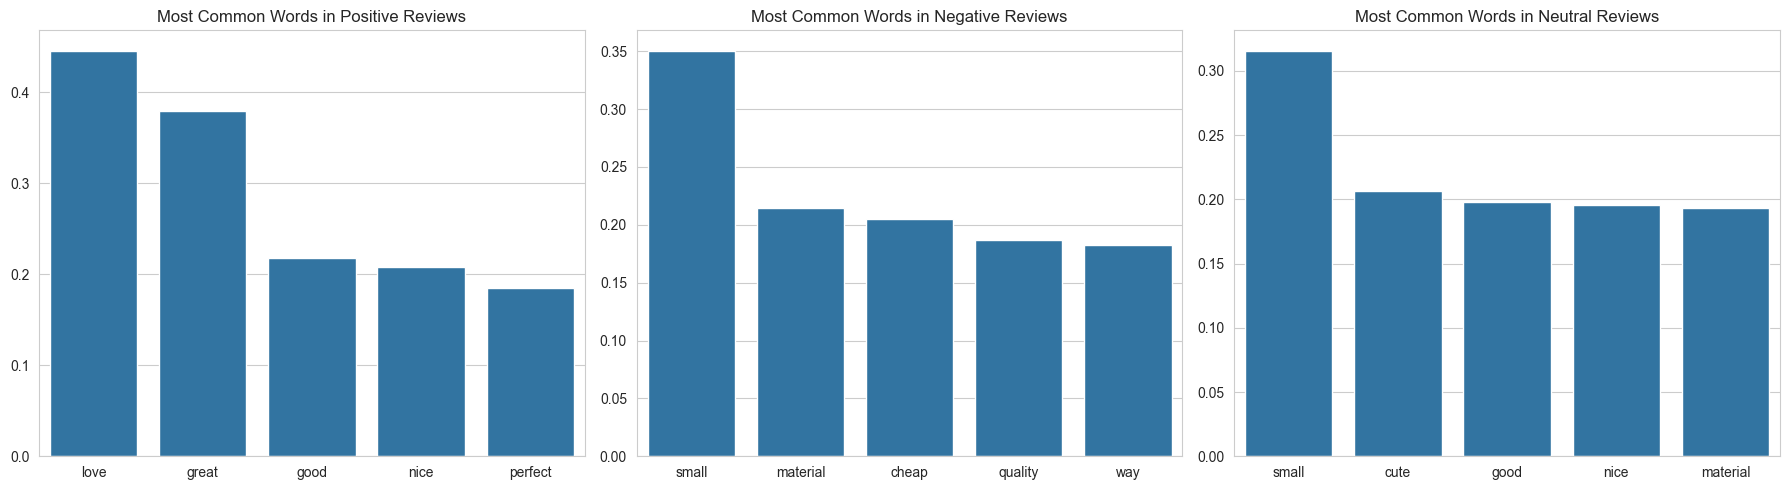

The dataset has mostly Positive reviews.


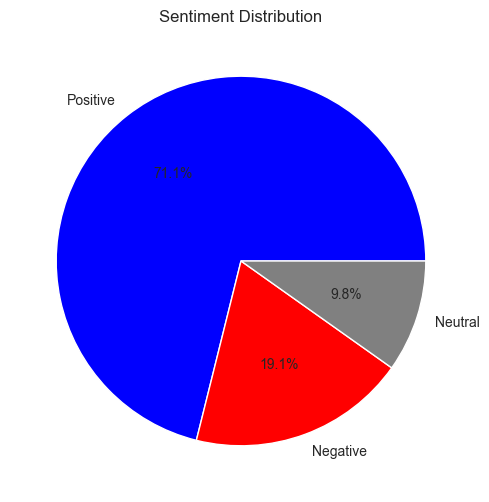

The dataset contains 2337702 verified purchases.
The dataset has 6.53% unverified reviews.


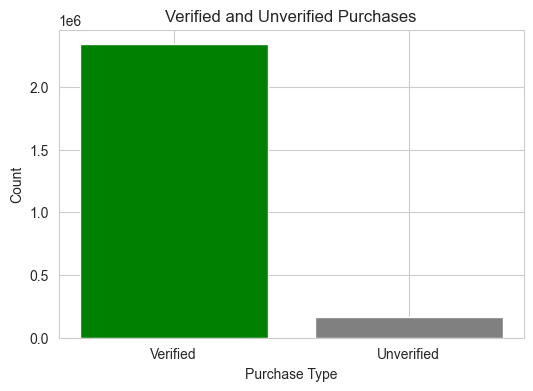

Most verified purchases posted Positive reviews.


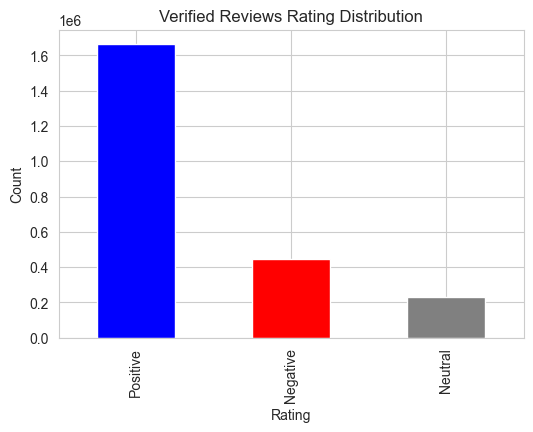

Most unverified purchases posted Positive reviews.


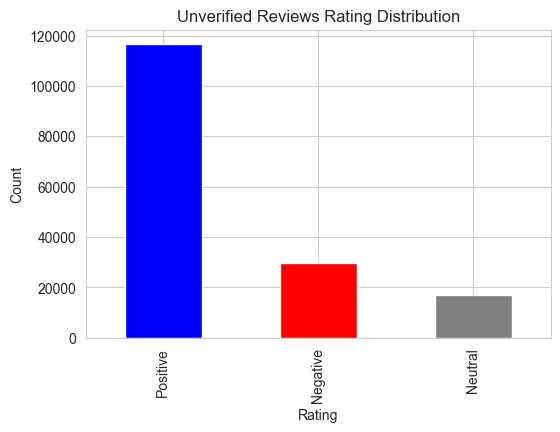

Unverified and Positive Sentiment: 116503
Unverified and Negative Sentiment: 29824


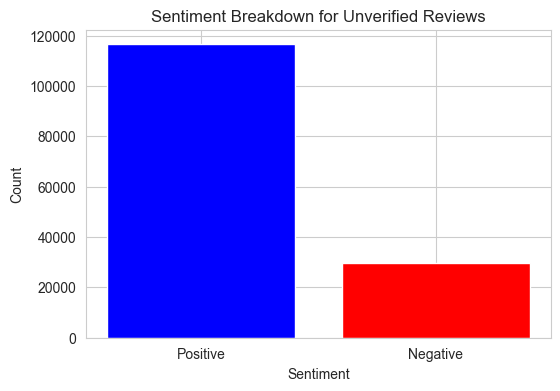

Verified and Positive Sentiment: 1662092
Verified and Negative Sentiment: 447049


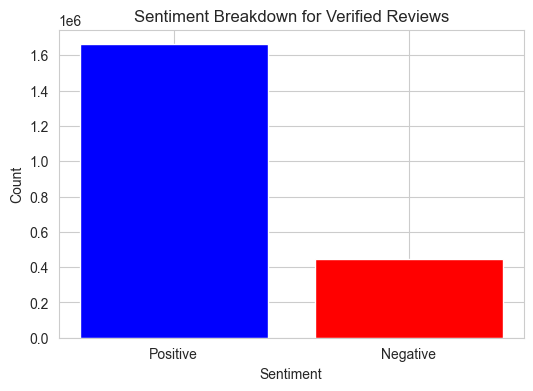

Positive ratings: 71.12%
Average votes for positive ratings: 0.57
Negative ratings: 19.07%
Average votes for negative ratings: 0.58


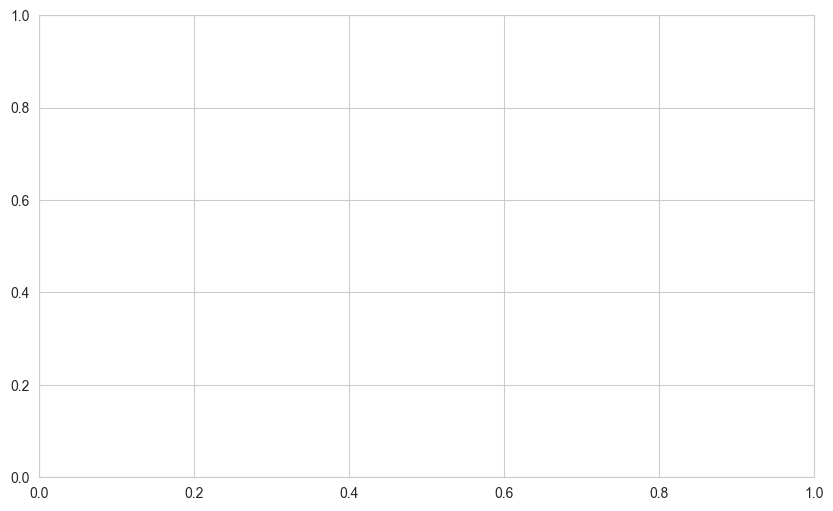

In [14]:
# Summary of dataset
print("The summary of Amazon 2024 Fashion Reviews:\n")

# Function to clean and extract words
def extract_words(text):
    """Extract words from text, removing stopwords and lemmatizing."""
    if isinstance(text, str):
        words = re.findall(r'\b\w+\b', text.lower())  # Tokenize words
        words = [lemmatizer.lemmatize(word) for word in words if word not in stop_words]  # Remove stopwords & lemmatize
        return words
    return []

# Define positive and negative words to filter
positive_words = {"good", "great", "love", "nice", "amazing", "excellent", "perfect", "best", "wonderful", "comfortable"}
negative_words = {"bad", "terrible", "worst", "poor", "awful", "disappointed", "cheap", "uncomfortable", "return", "broken"}

# Neutral words that appear in all sentiments
neutral_words = {"fit", "size", "wear", "look", "like", "color", "fabric", "feel"}

# Apply word extraction
df["processed_text"] = df["cleaned_text"].dropna().apply(extract_words)

# Most used words overall (excluding neutral words)
all_words = [word for words in df["processed_text"].dropna() for word in words if word not in neutral_words]
most_common_words = Counter(all_words).most_common(10)
print("Most used words overall:", most_common_words)

# Most used words per sentiment (using TF-IDF filtering)
sentiments = ["Positive", "Negative", "Neutral"]
word_counts = {}

for sentiment in sentiments:
    sentiment_words = [
        word for words in df[df["generalized_rating"] == sentiment]["processed_text"].dropna()
        for word in words
    ]

    # Remove words that contradict sentiment
    if sentiment == "Positive":
        sentiment_words = [word for word in sentiment_words if word not in negative_words and word not in neutral_words]
    elif sentiment == "Negative":
        sentiment_words = [word for word in sentiment_words if word not in positive_words and word not in neutral_words]
    else:
        sentiment_words = [word for word in sentiment_words if word not in neutral_words]

    # Apply TF-IDF filtering
    vectorizer = TfidfVectorizer()
    tfidf_matrix = vectorizer.fit_transform([" ".join(sentiment_words)])
    tfidf_scores = dict(zip(vectorizer.get_feature_names_out(), tfidf_matrix.toarray().flatten()))

    # Sort words by TF-IDF score and take the top 5
    sorted_words = sorted(tfidf_scores.items(), key=lambda x: x[1], reverse=True)[:5]
    word_counts[sentiment] = sorted_words

    print(f"Most used words in {sentiment} reviews:", [(word, f"{score:.2%}") for word, score in word_counts[sentiment]])


# Plotting word distributions
fig, axes = plt.subplots(1, 3, figsize=(18, 5))
for idx, sentiment in enumerate(sentiments):
    sns.barplot(x=[word[0] for word in word_counts[sentiment]], y=[word[1] for word in word_counts[sentiment]], ax=axes[idx])
    axes[idx].set_title(f"Most Common Words in {sentiment} Reviews")
plt.tight_layout()
plt.show()

# Sentiment distribution
overall_sentiment = df["generalized_rating"].mode()[0]
print(f"The dataset has mostly {overall_sentiment} reviews.")

# Pie chart for sentiment distribution
sentiment_counts = df["generalized_rating"].value_counts()
plt.figure(figsize=(6, 6))
plt.pie(sentiment_counts, labels=sentiment_counts.index, autopct='%1.1f%%', colors=['blue', 'red', 'gray'])
plt.title("Sentiment Distribution")
plt.show()

# Verified and unverified purchases
verified_count = df["verified_purchase"].sum()
unverified_count = len(df) - verified_count
percent_unverified = (unverified_count / len(df)) * 100
print(f"The dataset contains {verified_count} verified purchases.")
print(f"The dataset has {percent_unverified:.2f}% unverified reviews.")

# Plot for verified and unverified purchases
plt.figure(figsize=(6, 4))
plt.bar(["Verified", "Unverified"], [verified_count, unverified_count], color=['green', 'gray'])
plt.title("Verified and Unverified Purchases")
plt.xlabel("Purchase Type")
plt.ylabel("Count")
plt.show()

# Most common rating for verified purchases
verified_df = df[df["verified_purchase"] == True]
most_common_verified_rating = verified_df["generalized_rating"].mode()[0]
print(f"Most verified purchases posted {most_common_verified_rating} reviews.")

#plot common rating for verified purchases
verified_df["generalized_rating"].value_counts().plot(kind='bar', color=['blue', 'red', 'gray'], figsize=(6, 4))
plt.title("Verified Reviews Rating Distribution")
plt.xlabel("Rating")
plt.ylabel("Count")
plt.show()

# Most common rating for unverified purchases
unverified_df = df[df["verified_purchase"] == False]
most_common_unverified_rating = unverified_df["generalized_rating"].mode()[0]
print(f"Most unverified purchases posted {most_common_unverified_rating} reviews.")

#plot common rating for unverified purchases
unverified_df["generalized_rating"].value_counts().plot(kind='bar', color=['blue', 'red', 'gray'], figsize=(6, 4))
plt.title("Unverified Reviews Rating Distribution")
plt.xlabel("Rating")
plt.ylabel("Count")
plt.show()

# Sentiment breakdown for unverified reviews
unverified_df = df[df["verified_purchase"] == False]
unverified_positive = (unverified_df["generalized_rating"] == "Positive").sum()
unverified_negative = (unverified_df["generalized_rating"] == "Negative").sum()
print(f"Unverified and Positive Sentiment: {unverified_positive}")
print(f"Unverified and Negative Sentiment: {unverified_negative}")

# Plot sentiment breakdown for unverified reviews
plt.figure(figsize=(6, 4))
plt.bar(["Positive", "Negative"], [unverified_positive, unverified_negative], color=['blue', 'red'])
plt.title("Sentiment Breakdown for Unverified Reviews")
plt.xlabel("Sentiment")
plt.ylabel("Count")
plt.show()

# Sentiment breakdown for verified reviews
verified_df = df[df["verified_purchase"] == True]
verified_positive = (verified_df["generalized_rating"] == "Positive").sum()
verified_negative = (verified_df["generalized_rating"] == "Negative").sum()
print(f"Verified and Positive Sentiment: {verified_positive}")
print(f"Verified and Negative Sentiment: {verified_negative}")

# Plot sentiment breakdown for verified reviews
plt.figure(figsize=(6, 4))
plt.bar(["Positive", "Negative"], [verified_positive, verified_negative], color=['blue', 'red'])
plt.title("Sentiment Breakdown for Verified Reviews")
plt.xlabel("Sentiment")
plt.ylabel("Count")
plt.show()

# Positive rating percentage
positive_rating_percent = (df[df["generalized_rating"] == "Positive"].shape[0] / len(df)) * 100
print(f"Positive ratings: {positive_rating_percent:.2f}%")

# Average votes for positive ratings
avg_votes_positive = df[df["generalized_rating"] == "Positive"]["helpful_vote"].mean()
print(f"Average votes for positive ratings: {avg_votes_positive:.2f}")

#negative rating percentage
negative_rating_percent = (df[df["generalized_rating"] == "Negative"].shape[0] / len(df)) * 100
print(f"Negative ratings: {negative_rating_percent:.2f}%")

# Average votes for negative ratings
avg_votes_negative = df[df["generalized_rating"] == "Negative"]["helpful_vote"].mean()
print(f"Average votes for negative ratings: {avg_votes_negative:.2f}")

# Plotting characterization rules
fig, ax = plt.subplots(figsize=(10, 6))



In [21]:
import pandas as pd

# Sample data frame (replace with your actual df)
# df = pd.read_csv("your_dataset.csv") 

# Function to calculate typical value and T-weight
def get_typical_value_and_t_weight(df, sentiment, verified, column):
    group = df[(df["generalized_rating"] == sentiment) & (df["verified_purchase"] == verified)]
    typical_value = group[column].value_counts().idxmax()
    t_weight = (group[column] == typical_value).mean() * 100
    return typical_value, t_weight

rules = []

# Define your sentiments and verification status
for sentiment in ["Positive", "Negative", "Neutral"]:
    for verified in [True, False]:
        ver_status = "Verified" if verified else "Unverified"

        # Typical Review Length
        length_value, length_t_weight = get_typical_value_and_t_weight(df, sentiment, verified, "generalized_review_length")

        # Helpfulness Percentage
        helpful_group = df[(df["generalized_rating"] == sentiment) & (df["verified_purchase"] == verified)]
        helpfulness = (helpful_group["generalized_helpful_vote"] != "Not Helpful").mean() * 100
        help_t_weight = ((helpful_group["generalized_helpful_vote"] != "Not Helpful")).mean() * 100  # same as helpfulness

        # Append rules for review length and helpfulness
        rules.append({
            "IF": f"Sentiment = {sentiment} AND Verification = {ver_status}",
            "THEN": f"Typical Review Length = {length_value}",
            "T-Weight (%)": round(length_t_weight, 2)
        })
        rules.append({
            "IF": f"Sentiment = {sentiment} AND Verification = {ver_status}",
            "THEN": f"Helpfulness = Helpful",
            "T-Weight (%)": round(help_t_weight, 2)
        })

# Convert to DataFrame for viewing or export
characterization_rules_df = pd.DataFrame(rules)

# Print the rules line by line
for index, row in characterization_rules_df.iterrows():
    print(f"IF {row['IF']} \n THEN {row['THEN']} \n  T-Weight: {row['T-Weight (%)']}%")

# Convert the final rules table to a CSV (if needed)
characterization_rules_df.to_csv("characterization_if_then_rules.csv", index=False)



IF Sentiment = Positive AND Verification = Verified 
 THEN Typical Review Length = Short 
  T-Weight: 38.99%
IF Sentiment = Positive AND Verification = Verified 
 THEN Helpfulness = Helpful 
  T-Weight: 18.94%
IF Sentiment = Positive AND Verification = Unverified 
 THEN Typical Review Length = Long 
  T-Weight: 33.63%
IF Sentiment = Positive AND Verification = Unverified 
 THEN Helpfulness = Helpful 
  T-Weight: 18.47%
IF Sentiment = Negative AND Verification = Verified 
 THEN Typical Review Length = Short 
  T-Weight: 40.72%
IF Sentiment = Negative AND Verification = Verified 
 THEN Helpfulness = Helpful 
  T-Weight: 22.6%
IF Sentiment = Negative AND Verification = Unverified 
 THEN Typical Review Length = Short 
  T-Weight: 35.15%
IF Sentiment = Negative AND Verification = Unverified 
 THEN Helpfulness = Helpful 
  T-Weight: 20.28%
IF Sentiment = Neutral AND Verification = Verified 
 THEN Typical Review Length = Short 
  T-Weight: 39.0%
IF Sentiment = Neutral AND Verification = Verif

In [25]:
characterization_rules_df

,IF,THEN,T-Weight (%)
0,Sentiment = Positive AND Verification = Verified,Typical Review Length = Short,38.99
1,Sentiment = Positive AND Verification = Verified,Helpfulness = Helpful,18.94
2,Sentiment = Positive AND Verification = Unveri...,Typical Review Length = Long,33.63
3,Sentiment = Positive AND Verification = Unveri...,Helpfulness = Helpful,18.47
4,Sentiment = Negative AND Verification = Verified,Typical Review Length = Short,40.72
5,Sentiment = Negative AND Verification = Verified,Helpfulness = Helpful,22.60
6,Sentiment = Negative AND Verification = Unveri...,Typical Review Length = Short,35.15
7,Sentiment = Negative AND Verification = Unveri...,Helpfulness = Helpful,20.28
8,Sentiment = Neutral AND Verification = Verified,Typical Review Length = Short,39.00
9,Sentiment = Neutral AND Verification = Verified,Helpfulness = Helpful,21.23


In [29]:
import pandas as pd

# Sample data frame (replace with your actual df)
data = [
    ("Sentiment = Positive AND Verification = Verified", "Typical Review Length = Short", 38.99),
    ("Sentiment = Positive AND Verification = Verified", "Helpfulness = Helpful", 18.94),
    ("Sentiment = Positive AND Verification = Unverified", "Typical Review Length = Long", 33.63),
    ("Sentiment = Positive AND Verification = Unverified", "Helpfulness = Helpful", 18.47),
    ("Sentiment = Negative AND Verification = Verified", "Typical Review Length = Short", 40.72),
    ("Sentiment = Negative AND Verification = Verified", "Helpfulness = Helpful", 22.60),
    ("Sentiment = Negative AND Verification = Unverified", "Typical Review Length = Short", 35.15),
    ("Sentiment = Negative AND Verification = Unverified", "Helpfulness = Helpful", 20.28),
    ("Sentiment = Neutral AND Verification = Verified", "Typical Review Length = Short", 39.00),
    ("Sentiment = Neutral AND Verification = Verified", "Helpfulness = Helpful", 21.23),
    ("Sentiment = Neutral AND Verification = Unverified", "Typical Review Length = Long", 36.16),
    ("Sentiment = Neutral AND Verification = Unverified", "Helpfulness = Helpful", 17.26),
]

# Create DataFrame from the provided data
df = pd.DataFrame(data, columns=["Rule", "Condition", "T-Weight (%)"])

# Extract Sentiment and Verification from the 'Rule' column
df[['Sentiment', 'Verification']] = df['Rule'].str.extract(r"Sentiment = (.*?) AND Verification = (.*)")

# Separate the conditions into Review Length and Helpfulness
df['Review Length'] = df['Condition'].apply(lambda x: x if 'Review Length' in x else None)
df['Helpfulness'] = df['Condition'].apply(lambda x: x if 'Helpfulness' in x else None)

# Now, pivot the table to create the desired structure
summary_table = df.pivot_table(
    index=["Sentiment", "Verification"],
    values=["Review Length", "Helpfulness"],
    aggfunc="first"
).reset_index()

# Fill NaN values with "N/A" or any placeholder if necessary
summary_table = summary_table.fillna("N/A")

# Print the summary table
from IPython.display import display

print("\nSummary Table of Sentiment, Verification, and Characteristics:")
display(summary_table)

# Optionally, save the summary table to a CSV
summary_table.to_csv("sentiment_verification_characteristics_summary.csv", index=False)



Summary Table of Sentiment, Verification, and Characteristics:


,Sentiment,Verification,Helpfulness,Review Length
0,Negative,Unverified,Helpfulness = Helpful,Typical Review Length = Short
1,Negative,Verified,Helpfulness = Helpful,Typical Review Length = Short
2,Neutral,Unverified,Helpfulness = Helpful,Typical Review Length = Long
3,Neutral,Verified,Helpfulness = Helpful,Typical Review Length = Short
4,Positive,Unverified,Helpfulness = Helpful,Typical Review Length = Long
5,Positive,Verified,Helpfulness = Helpful,Typical Review Length = Short
